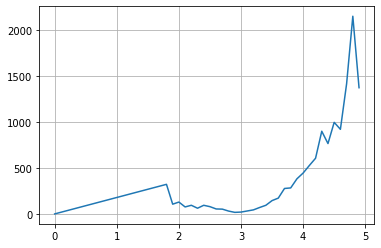

In [44]:
"""
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant

Answer: To get the idea of rating and how many votes they might have got, I have applied data compression technique as 
number of votes can be so huge for a particular restaurant. To compress the data I have first added all the votes by
the rating and maintain total restaurants which will help me to figure out the average voting for each restaurants. 
So first I have made one dictionary which will hold the rating as key and total number of votes & restaurant count as a
value i.e a list 0th index is total number of votes and 1st restaurant count. Once I get these detail I can make average
by doing total_votes//no_restaurants so for each restaurants we will get the compressed voting numbers. After ploting
in the graph we can see that those restaurants get more vote they usually got good rating i.e 4-5 and voting range is
500 - 2000. Now if we see the low rating then we can find that there are less voting as compare to 4-5 rating range voting.
From the above explanation I can say that if we go with large number of voting for a restaurant they we will get 
good food usually. 
"""

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset
zomato_df = pd.read_csv("zomato_utf.csv")
# print(zomato_df.shape)
# Only Indian Restaurants
zomato_df = zomato_df[zomato_df['Country Code']==1]
zomato_df['Rating with Votes'] = zomato_df['Aggregate rating'].astype(str) + "###" + zomato_df['Votes'].astype(str)


range_with_votes = {}

def get_counts(rating_and_votes):
    rating = round(float(rating_and_votes.split("###")[0]),2)
    votes = int(float(rating_and_votes.split("###")[1]))
    if rating not in range_with_votes:
        range_with_votes[rating] = [votes,1]
    else:
        range_with_votes[rating][0]+=votes
        range_with_votes[rating][1]+=1
    

zomato_df['Rating with Votes'].apply(get_counts)

total_votes_rating = [[key,value[0]//value[1]] for key,value in range_with_votes.items()]

total_votes_rating.sort()
total_votes = [i[1] for i in total_votes_rating]
rating = [i[0] for i in total_votes_rating]

plt.plot(rating,total_votes)
plt.grid()
plt.show()

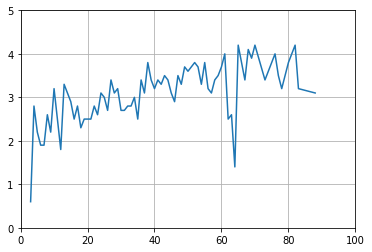

In [80]:
"""
Restaurant serving more number of cuisines.

NOTE: Data Compression is applied as numbers are huge and it might not fit in the graph properly. 

Answer: I have applied the same technique just in this case and for below cases I haven't used any function to
get the desired result. Here I have twicked the scenario little because we need to check with the number of cuisines
so I made number of cuisines as key and I have stored all the rating given to particular number of cuisines and side 
by side I have stored the number of restaurants. After doing this, I am finding the avgerage rating for that particular
number of cuisines right. And rating will lie between the min rating and max rating got by number of cuisines. To find
out the average rating I have used total_rating/restaurant_count. After ploting the detail in the graph we can notice
the higher number of cuisines offered more is the rating. 60 - 80 range has got the higher ratings. But still there are
some restaurants after offering ample number of cuisines still they couldn't get good rating. So it will be better to
go with more number cuisines offered by a restaurant. 

"""

ratings = np.array(zomato_df['Aggregate rating'])
cuisines = np.array(zomato_df['Cuisines'])
rating_with_no_cuisines = {}


for i in range(len(ratings)):
    no_cuisines = len(cuisines[i])
    if no_cuisines not in rating_with_no_cuisines:
        rating_with_no_cuisines[no_cuisines] = [[ratings[i]],1]
    else:
        rating_with_no_cuisines[no_cuisines][0].append(ratings[i])
        rating_with_no_cuisines[no_cuisines][1]+=1

no_cuisines_with_avg_rating = []
# print(no_cuisines_with_avg_rating)
for key, value in rating_with_no_cuisines.items():
    avg_rating = round(sum(value[0])/value[1],1)
    no_cuisines_with_avg_rating.append([key,avg_rating])
no_cuisines_with_avg_rating.sort(reverse=True)
no_cuisines_present = [i[0] for i in no_cuisines_with_avg_rating]
avg_ratings = [i[1] for i in no_cuisines_with_avg_rating]

plt.plot(no_cuisines_present,avg_ratings)
plt.axis([0,100,0,5])
plt.grid()
plt.show()

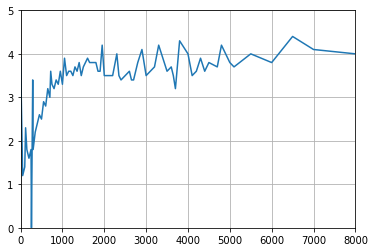

In [88]:
"""
Average Cost of Restaurant

NOTE: Data Compression is applied as numbers are huge and it might not fit in the graph properly. 

Answer: As I have said earlier, I have applied the same logic so I am not re-iterating the same thing. Here I have used
cost of two as the key and store all the ratings for a particular cost and side by side I have store the count of
restaurants inorder to get the average. Once all the data stored in the dictionary I have found the average by
total_ratings/restaurant_counts. After ploting the graph it is indicating that more cost of two more is the rating of the
restaurant. When cost of two gets more than 2000 the rating becomes stagnant i.e we can say that there is no big fluctuation.
So if we select a restaurant wherein cost of two in between 1000 - 2000 that will provide us good food. 


"""
ratings = np.array(zomato_df['Aggregate rating'])
cost_of_two = np.array(zomato_df['Average Cost for two'])


rating_with_cost_of_two = {}


for i in range(len(ratings)):
    if cost_of_two[i] not in rating_with_cost_of_two:
        rating_with_cost_of_two[cost_of_two[i]] = [[ratings[i]],1]
    else:
        rating_with_cost_of_two[cost_of_two[i]][0].append(ratings[i])
        rating_with_cost_of_two[cost_of_two[i]][1]+=1

cost_of_two_with_avg_rating = []
# print(no_cuisines_with_avg_rating)
for key, value in rating_with_cost_of_two.items():
    avg_rating = round(sum(value[0])/value[1],1)
    cost_of_two_with_avg_rating.append([key,avg_rating])
cost_of_two_with_avg_rating.sort(reverse=True)
cost_of_two = [i[0] for i in cost_of_two_with_avg_rating]
avg_ratings = [i[1] for i in cost_of_two_with_avg_rating]

plt.plot(cost_of_two,avg_ratings)
plt.axis([0,8000,0,5])
plt.grid()
plt.show()


